In [1]:
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt

from copy import deepcopy

In [2]:
from dataset.dataloader import train_dl, test_dl, val_dl
from auto_encoder.model_822 import AutoEncoder

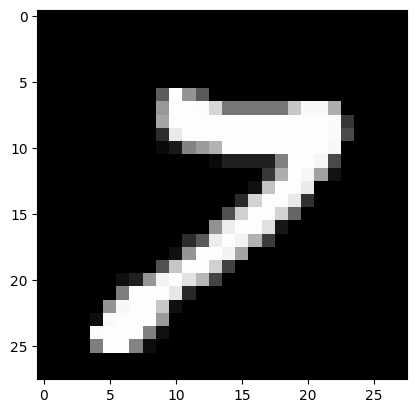

In [3]:
images, labels = next(iter(train_dl))

plt.imshow(images[0].squeeze(), cmap="gray")

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoEncoder(images.shape[1]).to(device)
device

device(type='cuda')

In [5]:
EPOCHS = 100
lr = 0.0001
loss_func = torch.nn.L1Loss()
optim = torch.optim.Adam(model.parameters(), lr=lr)

In [6]:
train_loss_per_epoch = []
valid_loss_per_epoch = []
counter = 0
best_model = None

for epoch in range(EPOCHS):
    print("Epoch: [{}/{}]".format(epoch+1, EPOCHS))
    train_loss = []
    val_loss = []
    for X, y in tqdm(train_dl):
        X = X.to(device)
        model.zero_grad()
        rec_X = model(X)
        loss = loss_func(X, rec_X)
        train_loss.append(loss.item())
        loss.backward()
        optim.step()

    for X, y in tqdm(val_dl):
        with torch.no_grad():
            X = X.to(device)
            rec_X = model(X)
            loss = loss_func(X, rec_X)
            val_loss.append(loss.item())
    
    train_loss_per_epoch.append(sum(train_loss)/len(train_loss))
    valid_loss_per_epoch.append(sum(val_loss)/len(val_loss))

    if valid_loss_per_epoch[-1] == min(valid_loss_per_epoch):
        counter = 0
        best_model = deepcopy(model)
    
    else:
        counter += 1

    print("\tTrain loss: {}".format(train_loss_per_epoch[-1]))
    print("\t  Val loss: {}".format(valid_loss_per_epoch[-1]))

    if counter == 10:
        print("\nEarly stop: model is not converging")
        break

Epoch: [1/100]


100%|██████████| 313/313 [00:00<00:00, 683.16it/s]


	Train loss: 0.1424814532160759
	  Val loss: 0.12467856329089155
Epoch: [2/100]


100%|██████████| 313/313 [00:00<00:00, 698.49it/s]


	Train loss: 0.11657106477419535
	  Val loss: 0.11280786198453781
Epoch: [3/100]


100%|██████████| 313/313 [00:00<00:00, 684.80it/s]


	Train loss: 0.10825320085088412
	  Val loss: 0.10656442059971653
Epoch: [4/100]


100%|██████████| 313/313 [00:00<00:00, 741.03it/s]


	Train loss: 0.10308511582612992
	  Val loss: 0.1023280810291013
Epoch: [5/100]


100%|██████████| 313/313 [00:00<00:00, 734.66it/s]


	Train loss: 0.09953749632835387
	  Val loss: 0.09882829728694008
Epoch: [6/100]


100%|██████████| 313/313 [00:00<00:00, 706.55it/s]


	Train loss: 0.09597006608843803
	  Val loss: 0.09511675085789098
Epoch: [7/100]


100%|██████████| 313/313 [00:00<00:00, 704.96it/s]


	Train loss: 0.09216535727381706
	  Val loss: 0.09129525668704852
Epoch: [8/100]


100%|██████████| 313/313 [00:00<00:00, 700.23it/s]


	Train loss: 0.08900077465275924
	  Val loss: 0.08843284133619393
Epoch: [9/100]


100%|██████████| 313/313 [00:00<00:00, 719.31it/s]


	Train loss: 0.08648452618718147
	  Val loss: 0.08614027476348816
Epoch: [10/100]


100%|██████████| 313/313 [00:00<00:00, 687.91it/s]


	Train loss: 0.08459503483772278
	  Val loss: 0.08488310114168131
Epoch: [11/100]


100%|██████████| 313/313 [00:00<00:00, 694.01it/s]


	Train loss: 0.08299996688663959
	  Val loss: 0.08275210520567985
Epoch: [12/100]


100%|██████████| 313/313 [00:00<00:00, 668.32it/s]


	Train loss: 0.08147443599204222
	  Val loss: 0.08105703701559729
Epoch: [13/100]


100%|██████████| 313/313 [00:00<00:00, 684.69it/s]


	Train loss: 0.07978944110969702
	  Val loss: 0.07920087541873082
Epoch: [14/100]


100%|██████████| 313/313 [00:00<00:00, 711.37it/s]


	Train loss: 0.07767237240374088
	  Val loss: 0.07684641742049314
Epoch: [15/100]


100%|██████████| 313/313 [00:00<00:00, 710.70it/s]


	Train loss: 0.07544106283187867
	  Val loss: 0.07453281220536644
Epoch: [16/100]


100%|██████████| 313/313 [00:00<00:00, 684.90it/s]


	Train loss: 0.07328628525237242
	  Val loss: 0.07241411271472327
Epoch: [17/100]


100%|██████████| 313/313 [00:00<00:00, 717.89it/s]


	Train loss: 0.07132902300159137
	  Val loss: 0.07064154412085637
Epoch: [18/100]


100%|██████████| 313/313 [00:00<00:00, 684.90it/s]


	Train loss: 0.06964107134838898
	  Val loss: 0.06901166017967672
Epoch: [19/100]


100%|██████████| 313/313 [00:00<00:00, 701.73it/s]


	Train loss: 0.06814253140886625
	  Val loss: 0.06749117080443584
Epoch: [20/100]


100%|██████████| 313/313 [00:00<00:00, 647.80it/s]


	Train loss: 0.06680744144022464
	  Val loss: 0.06622785012038371
Epoch: [21/100]


100%|██████████| 313/313 [00:00<00:00, 325.76it/s]


	Train loss: 0.06557580035030842
	  Val loss: 0.06558539940954779
Epoch: [22/100]


100%|██████████| 313/313 [00:00<00:00, 727.91it/s]


	Train loss: 0.0644652582526207
	  Val loss: 0.06362129915684175
Epoch: [23/100]


100%|██████████| 313/313 [00:00<00:00, 708.02it/s]


	Train loss: 0.0634148142794768
	  Val loss: 0.06288946736544467
Epoch: [24/100]


100%|██████████| 313/313 [00:00<00:00, 689.43it/s]


	Train loss: 0.06246411766211192
	  Val loss: 0.06188321236175851
Epoch: [25/100]


100%|██████████| 313/313 [00:00<00:00, 714.55it/s]


	Train loss: 0.061563668702046076
	  Val loss: 0.06085846663568728
Epoch: [26/100]


100%|██████████| 313/313 [00:00<00:00, 709.39it/s]


	Train loss: 0.06071735537747542
	  Val loss: 0.06028600415577904
Epoch: [27/100]


100%|██████████| 313/313 [00:00<00:00, 687.82it/s]


	Train loss: 0.059915671694278715
	  Val loss: 0.05938620367846169
Epoch: [28/100]


100%|██████████| 313/313 [00:00<00:00, 668.55it/s]


	Train loss: 0.05918480072617531
	  Val loss: 0.05865613424692291
Epoch: [29/100]


100%|██████████| 313/313 [00:00<00:00, 701.80it/s]


	Train loss: 0.05845047968029976
	  Val loss: 0.0581061636178067
Epoch: [30/100]


100%|██████████| 313/313 [00:00<00:00, 712.99it/s]


	Train loss: 0.057810645584265394
	  Val loss: 0.057724284240232106
Epoch: [31/100]


100%|██████████| 313/313 [00:00<00:00, 714.61it/s]


	Train loss: 0.05718185851871967
	  Val loss: 0.05686387577995706
Epoch: [32/100]


100%|██████████| 313/313 [00:00<00:00, 683.08it/s]


	Train loss: 0.056624345284700395
	  Val loss: 0.05640449911689225
Epoch: [33/100]


100%|██████████| 313/313 [00:00<00:00, 704.96it/s]


	Train loss: 0.056127353434761364
	  Val loss: 0.055699841425822565
Epoch: [34/100]


100%|██████████| 313/313 [00:00<00:00, 686.15it/s]


	Train loss: 0.05565439536174138
	  Val loss: 0.055232903887383854
Epoch: [35/100]


100%|██████████| 313/313 [00:00<00:00, 712.99it/s]


	Train loss: 0.05519958952665329
	  Val loss: 0.054966110509995836
Epoch: [36/100]


100%|██████████| 313/313 [00:00<00:00, 697.88it/s]


	Train loss: 0.0547646681646506
	  Val loss: 0.054395096858564654
Epoch: [37/100]


100%|██████████| 313/313 [00:00<00:00, 704.87it/s]


	Train loss: 0.05433983837564786
	  Val loss: 0.05401462718796806
Epoch: [38/100]


100%|██████████| 313/313 [00:00<00:00, 700.23it/s]


	Train loss: 0.05391404587725798
	  Val loss: 0.053580439735810975
Epoch: [39/100]


100%|██████████| 313/313 [00:00<00:00, 700.82it/s]


	Train loss: 0.05353409470021725
	  Val loss: 0.053090327606795315
Epoch: [40/100]


100%|██████████| 313/313 [00:00<00:00, 700.91it/s]


	Train loss: 0.05318554285267989
	  Val loss: 0.052806274411967766
Epoch: [41/100]


100%|██████████| 313/313 [00:00<00:00, 717.60it/s]


	Train loss: 0.05279625726640225
	  Val loss: 0.0528504868475393
Epoch: [42/100]


100%|██████████| 313/313 [00:00<00:00, 705.03it/s]


	Train loss: 0.052462076044082644
	  Val loss: 0.05240305350087702
Epoch: [43/100]


100%|██████████| 313/313 [00:00<00:00, 678.58it/s]


	Train loss: 0.05212494498292605
	  Val loss: 0.0518319539773388
Epoch: [44/100]


100%|██████████| 313/313 [00:00<00:00, 690.81it/s]


	Train loss: 0.05185166377425194
	  Val loss: 0.051458292673475826
Epoch: [45/100]


100%|██████████| 313/313 [00:00<00:00, 695.56it/s]


	Train loss: 0.051548660333951314
	  Val loss: 0.05148157885613533
Epoch: [46/100]


100%|██████████| 313/313 [00:00<00:00, 708.15it/s]


	Train loss: 0.051259666512409846
	  Val loss: 0.05096856767710405
Epoch: [47/100]


100%|██████████| 313/313 [00:00<00:00, 704.96it/s]


	Train loss: 0.05104665245612462
	  Val loss: 0.05103759747296096
Epoch: [48/100]


100%|██████████| 313/313 [00:00<00:00, 697.11it/s]


	Train loss: 0.05076183130343755
	  Val loss: 0.05034999445842478
Epoch: [49/100]


100%|██████████| 313/313 [00:00<00:00, 674.57it/s]


	Train loss: 0.05054292668402195
	  Val loss: 0.050378293441697815
Epoch: [50/100]


100%|██████████| 313/313 [00:00<00:00, 701.80it/s]


	Train loss: 0.05031899386644363
	  Val loss: 0.050033463551975285
Epoch: [51/100]


100%|██████████| 313/313 [00:00<00:00, 720.95it/s]


	Train loss: 0.05008824155330658
	  Val loss: 0.049835967084470266
Epoch: [52/100]


100%|██████████| 313/313 [00:00<00:00, 703.46it/s]


	Train loss: 0.04988538077622652
	  Val loss: 0.05013814700630526
Epoch: [53/100]


100%|██████████| 313/313 [00:00<00:00, 696.32it/s]


	Train loss: 0.04967255951265494
	  Val loss: 0.049727236810393226
Epoch: [54/100]


100%|██████████| 313/313 [00:00<00:00, 701.00it/s]


	Train loss: 0.04949942956070105
	  Val loss: 0.04924499457731795
Epoch: [55/100]


100%|██████████| 313/313 [00:00<00:00, 704.96it/s]


	Train loss: 0.04929418060282866
	  Val loss: 0.04918450565812306
Epoch: [56/100]


100%|██████████| 313/313 [00:00<00:00, 711.37it/s]


	Train loss: 0.04909495958089829
	  Val loss: 0.048939784685262853
Epoch: [57/100]


100%|██████████| 313/313 [00:00<00:00, 657.40it/s]


	Train loss: 0.048925758724908036
	  Val loss: 0.04857478428858157
Epoch: [58/100]


100%|██████████| 313/313 [00:00<00:00, 677.49it/s]


	Train loss: 0.04873802923957507
	  Val loss: 0.04832981438777698
Epoch: [59/100]


100%|██████████| 313/313 [00:00<00:00, 715.57it/s]


	Train loss: 0.04854281444400549
	  Val loss: 0.048334261015676463
Epoch: [60/100]


100%|██████████| 313/313 [00:00<00:00, 721.20it/s]


	Train loss: 0.04836429500679175
	  Val loss: 0.04815078680269634
Epoch: [61/100]


100%|██████████| 313/313 [00:00<00:00, 716.12it/s]


	Train loss: 0.048186818529168764
	  Val loss: 0.0477168337581828
Epoch: [62/100]


100%|██████████| 313/313 [00:00<00:00, 696.87it/s]


	Train loss: 0.048018667017420136
	  Val loss: 0.04774413117395041
Epoch: [63/100]


100%|██████████| 313/313 [00:00<00:00, 664.09it/s]


	Train loss: 0.04784057881931464
	  Val loss: 0.04818962902401964
Epoch: [64/100]


100%|██████████| 313/313 [00:00<00:00, 678.96it/s]


	Train loss: 0.0476936034878095
	  Val loss: 0.04764752176861032
Epoch: [65/100]


100%|██████████| 313/313 [00:00<00:00, 663.73it/s]


	Train loss: 0.0475146388699611
	  Val loss: 0.046925250643168014
Epoch: [66/100]


100%|██████████| 313/313 [00:00<00:00, 700.23it/s]


	Train loss: 0.04734970811804136
	  Val loss: 0.04724980701510899
Epoch: [67/100]


100%|██████████| 313/313 [00:00<00:00, 696.78it/s]


	Train loss: 0.047195391822854676
	  Val loss: 0.04688758588732241
Epoch: [68/100]


100%|██████████| 313/313 [00:00<00:00, 701.07it/s]


	Train loss: 0.04704184676508109
	  Val loss: 0.046856782818659425
Epoch: [69/100]


100%|██████████| 313/313 [00:00<00:00, 704.16it/s]


	Train loss: 0.046891409197449684
	  Val loss: 0.0470765393834335
Epoch: [70/100]


100%|██████████| 313/313 [00:00<00:00, 703.37it/s]


	Train loss: 0.04675040202935537
	  Val loss: 0.046707590155232064
Epoch: [71/100]


100%|██████████| 313/313 [00:00<00:00, 667.08it/s]


	Train loss: 0.04659767899562915
	  Val loss: 0.046379501612993854
Epoch: [72/100]


100%|██████████| 313/313 [00:00<00:00, 689.43it/s]


	Train loss: 0.046471290107568106
	  Val loss: 0.04654453753139645
Epoch: [73/100]


100%|██████████| 313/313 [00:00<00:00, 680.43it/s]


	Train loss: 0.0462992160414656
	  Val loss: 0.04599995346971975
Epoch: [74/100]


100%|██████████| 313/313 [00:00<00:00, 676.89it/s]


	Train loss: 0.04617401407460372
	  Val loss: 0.04627423885816964
Epoch: [75/100]


100%|██████████| 313/313 [00:00<00:00, 697.11it/s]


	Train loss: 0.046034974243243536
	  Val loss: 0.04606899713127377
Epoch: [76/100]


100%|██████████| 313/313 [00:00<00:00, 683.10it/s]


	Train loss: 0.045897833798329034
	  Val loss: 0.04564039532940228
Epoch: [77/100]


100%|██████████| 313/313 [00:00<00:00, 695.56it/s]


	Train loss: 0.04575534505794446
	  Val loss: 0.04531601442696568
Epoch: [78/100]


100%|██████████| 313/313 [00:00<00:00, 674.51it/s]


	Train loss: 0.04562105787148078
	  Val loss: 0.04529442651250873
Epoch: [79/100]


100%|██████████| 313/313 [00:00<00:00, 699.95it/s]


	Train loss: 0.04549259235858917
	  Val loss: 0.045349808772817586
Epoch: [80/100]


100%|██████████| 313/313 [00:00<00:00, 698.52it/s]


	Train loss: 0.045379239174723626
	  Val loss: 0.04513746951096736
Epoch: [81/100]


100%|██████████| 313/313 [00:00<00:00, 701.80it/s]


	Train loss: 0.045268544336160024
	  Val loss: 0.044951342427121184
Epoch: [82/100]


100%|██████████| 313/313 [00:00<00:00, 714.61it/s]


	Train loss: 0.04511313904424508
	  Val loss: 0.04471242111235762
Epoch: [83/100]


100%|██████████| 313/313 [00:00<00:00, 709.19it/s]


	Train loss: 0.0450004787410299
	  Val loss: 0.04473986308843183
Epoch: [84/100]


100%|██████████| 313/313 [00:00<00:00, 693.74it/s]


	Train loss: 0.04487815665553013
	  Val loss: 0.04476276591134529
Epoch: [85/100]


100%|██████████| 313/313 [00:00<00:00, 695.56it/s]


	Train loss: 0.044758779923121134
	  Val loss: 0.044609022442810835
Epoch: [86/100]


100%|██████████| 313/313 [00:00<00:00, 712.99it/s]


	Train loss: 0.044630757159988085
	  Val loss: 0.044301351466879677
Epoch: [87/100]


100%|██████████| 313/313 [00:00<00:00, 666.19it/s]


	Train loss: 0.04452974975158771
	  Val loss: 0.04434147284339411
Epoch: [88/100]


100%|██████████| 313/313 [00:00<00:00, 671.68it/s]


	Train loss: 0.044405932666858036
	  Val loss: 0.04405954130255757
Epoch: [89/100]


100%|██████████| 313/313 [00:00<00:00, 704.96it/s]


	Train loss: 0.04430983930528164
	  Val loss: 0.043740707833450826
Epoch: [90/100]


100%|██████████| 313/313 [00:00<00:00, 704.96it/s]


	Train loss: 0.04417885824143886
	  Val loss: 0.043968169048380926
Epoch: [91/100]


100%|██████████| 313/313 [00:00<00:00, 712.99it/s]


	Train loss: 0.044080473413070045
	  Val loss: 0.04396935611868057
Epoch: [92/100]


100%|██████████| 313/313 [00:00<00:00, 701.80it/s]


	Train loss: 0.04396589899410804
	  Val loss: 0.04369997360502569
Epoch: [93/100]


100%|██████████| 313/313 [00:00<00:00, 706.55it/s]


	Train loss: 0.04386790336072445
	  Val loss: 0.04323722644688222
Epoch: [94/100]


100%|██████████| 313/313 [00:00<00:00, 690.95it/s]


	Train loss: 0.04374924805313349
	  Val loss: 0.04315690462962507
Epoch: [95/100]


100%|██████████| 313/313 [00:00<00:00, 665.96it/s]


	Train loss: 0.043664288837214314
	  Val loss: 0.04374098769439676
Epoch: [96/100]


100%|██████████| 313/313 [00:00<00:00, 698.66it/s]


	Train loss: 0.04354185911218325
	  Val loss: 0.04313860192133215
Epoch: [97/100]


100%|██████████| 313/313 [00:00<00:00, 698.57it/s]


	Train loss: 0.043443753428260484
	  Val loss: 0.04344396992994193
Epoch: [98/100]


100%|██████████| 313/313 [00:00<00:00, 689.43it/s]


	Train loss: 0.04333589076896509
	  Val loss: 0.04304322213553392
Epoch: [99/100]


100%|██████████| 313/313 [00:00<00:00, 700.23it/s]


	Train loss: 0.0432388966580232
	  Val loss: 0.04296065265901934
Epoch: [100/100]


100%|██████████| 313/313 [00:00<00:00, 689.00it/s]

	Train loss: 0.04313487798422575
	  Val loss: 0.04286629499528355


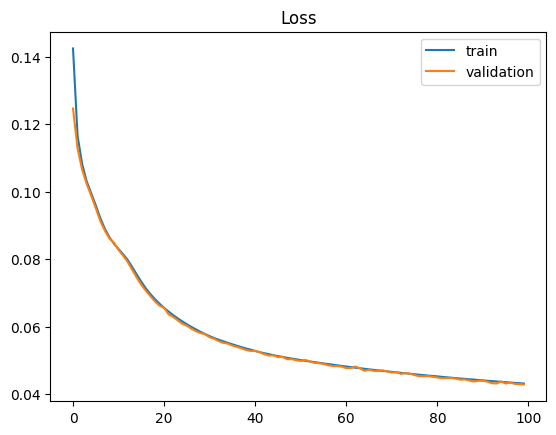

In [7]:
plt.plot(train_loss_per_epoch, label="train")
plt.plot(valid_loss_per_epoch, label="validation")
plt.legend()
plt.title("Loss")

plt.show()

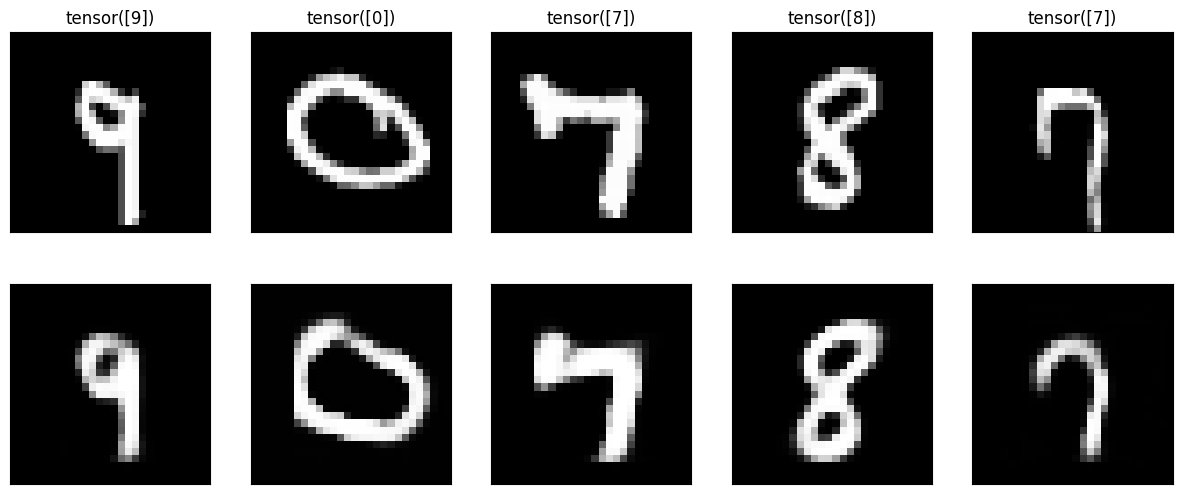

In [11]:

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
i = 0
skip = 5

for image, label in test_dl:
    if skip > 0:
        skip -= 1
        continue
    
    with torch.no_grad():
        rec = best_model(image.to(device))

    axs[0][i].imshow(image[0].squeeze(), cmap="gray")
    axs[1][i].imshow(rec[0].squeeze().cpu(), cmap="gray")
    axs[0][i].set_title(str(label))
    axs[0][i].set_xticks([])
    axs[0][i].set_yticks([])
    axs[1][i].set_xticks([])
    axs[1][i].set_yticks([])

    i += 1

    if i == 5:
        break

In [9]:
torch.save(best_model.state_dict(), "auto_encoder/weights/ae_8_2_2.dat")